# Decomposition model exercise

For modeling purposes, we often need to know the diffuse and direct irradiance; however, most times only global horizontal irradiance (GHI) is available.

Therefore, models have been developed that "decompose" GHI into diffuse and direct irradiance. Notably, most of the existing models were developed from hourly measurements.

Overall, the decomposition step is associated with high uncertainties, as you will see later in this exercise. Note that some of these uncertainties cancel out during the transposition step.

In [ ]:
# Install pvlib on Google Colab as this is not a standard package.
!pip install pvlib

In [2]:
import pvlib  # library for PV and solar calculations
import pandas as pd  # library for data analysis
import matplotlib.pyplot as plt  # library for plotting
import numpy as np  # library for math and linear algebra

## Step 1: Decomposition models

First, browse through the decomposition models available in pvlib-python [here](https://pvlib-python.readthedocs.io/en/stable/reference/irradiance/decomposition.html).

pvlib calls them "DNI estimation models", however, many of these models estimate diffuse fraction or DHI and only indirectly allows for calculation of DNI.

## Step 2: Retrieve example dataset
The next step is to retrieve the example dataset, which we will use for this exercise.

For the example we will retrieve data for 2024 from the Cabauw (CAB) BSRN station in the Netherlands.

**The username and password for the BSRN data server are available on the Learn exercise page.**

In [3]:
# write your code here
data, meta = pvlib.iotools.get_bsrn(
    station='CAB',
    start='2024-01-01',
    end='2024-12-31',
    username='redacted',
    password='redacted',
)

data.head()

,ghi,ghi_std,ghi_min,ghi_max,dni,dni_std,dni_min,dni_max,dhi,dhi_std,dhi_min,dhi_max,lwd,lwd_std,lwd_min,lwd_max,temp_air,relative_humidity,pressure
2024-01-01 00:00:00+00:00,-1.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.1,-1.0,-1.0,329.0,0.3,329.0,330.0,7.8,81.0,996.0
2024-01-01 00:01:00+00:00,-1.0,0.1,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.1,-1.0,-1.0,330.0,0.1,329.0,330.0,7.7,81.4,996.0
2024-01-01 00:02:00+00:00,-1.0,0.1,-1.0,-1.0,0.0,0.1,0.0,0.0,-1.0,0.0,-1.0,-1.0,329.0,0.3,329.0,330.0,7.6,82.4,996.0
2024-01-01 00:03:00+00:00,-1.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,-1.0,327.0,1.4,324.0,329.0,7.6,82.2,996.0
2024-01-01 00:04:00+00:00,-1.0,0.0,-1.0,-1.0,0.0,0.1,0.0,0.0,-1.0,0.0,-1.0,-1.0,323.0,0.6,322.0,324.0,7.7,81.8,996.0


## Step 3: Calculate solar position
First, we need to calculate the solar position, as this the solar zenith angle is a required input to decomposition models:

In [4]:
# write your code here

location = pvlib.location.Location(
    latitude=meta['latitude'],
    longitude=meta['longitude'],
)

solpos = location.get_solarposition(data.index)

## Step 4: Estimate DHI using decomposition models

Estimate DHI and DNI using the [Erbs model](https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.irradiance.erbs.html).

In [6]:
# write your code here

#### RESULT #####
erbs_estimate = pvlib.irradiance.erbs(
    ghi=data['ghi'],
    zenith=solpos['apparent_zenith'],
    datetime_or_doy=data.index,
)

erbs_estimate.head()

,dni,dhi,kt
2024-01-01 00:00:00+00:00,0.0,-1.0,0.0
2024-01-01 00:01:00+00:00,0.0,-1.0,0.0
2024-01-01 00:02:00+00:00,0.0,-1.0,0.0
2024-01-01 00:03:00+00:00,0.0,-1.0,0.0
2024-01-01 00:04:00+00:00,0.0,-1.0,0.0


## Step 5: Compare estimated and measured DHI/DNI

Once you have estimated DNI and DHI using the decomposition models, you have to compare the estimates with the actual measured values.

One way to do this is to make a scatter plot of estimated vs. measured irradiance for each of the two components. However, you are make the comparison as you seem fit.

Do they compare well?

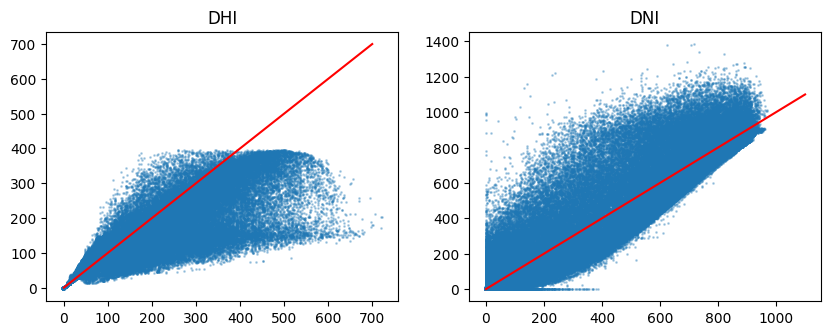

In [7]:
# write your code here

#### RESULT #####
fig, axes = plt.subplots(ncols=2, figsize=(10, 3.5))

axes[0].scatter(data['dhi'], erbs_estimate['dhi'], s=1, alpha=0.3)
axes[0].set_title('DHI')
axes[0].plot([0, 700], [0, 700], c='r')

axes[1].scatter(data['dni'], erbs_estimate['dni'], s=1, alpha=0.3)
axes[1].set_title('DNI')
axes[1].plot([0, 1100], [0, 1100], c='r')

plt.show()

## Step 6: Investigate which model is better
In this last step, you have to determine if the newer [Boland decomposition model](https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.irradiance.boland.html) is better.

In [8]:
# write your code here

#### RESULT #####
boland_estimate = pvlib.irradiance.boland(
    ghi=data['ghi'],
    solar_zenith=solpos['apparent_zenith'],
    datetime_or_doy=data.index,
)


is_daytime = solpos['apparent_zenith'] < 90

for component in ['dni', 'dhi']:
    erbs_rmse = np.sqrt(np.mean((erbs_estimate.loc[is_daytime, component] - data.loc[is_daytime, component])**2))
    boland_rmse = np.sqrt(np.mean((boland_estimate.loc[is_daytime, component] - data.loc[is_daytime, component])**2))

    print(component.upper())
    print(f"Erbs RMSE: {erbs_rmse:.1f}")
    print(f"Boland RMSE: {boland_rmse:.1f}")
    print('\n')

DNI
Erbs RMSE: 105.3
Boland RMSE: 111.4


DHI
Erbs RMSE: 58.3
Boland RMSE: 60.0




### RESULT
Based on the root mean square errors calculated above, the Erbs model performs better.

This is likely due to the measurements used to develop the model, where the Boland model was developed based on data for Australia which has a much different climate from Northern Europe.